# Data Augmentation (데이터 증강)
- 데이터는 문자, 숫자, 소리, 그림, 영상, 단어 등의 형태로 된 의미 단위 즉, 자료
- 증강은 수나 양을 늘려 더 강하게 하는 것
- 데이터 증강은 자료의 수나 양을 늘려서 더 강하게 한다는 의미로 해석
- 데이터 증강은 머신러닝을 위해 기존 데이터를 변형하여 새로운 데이터를 생성하는 기법

랜덤 이미지 생성 및 표시

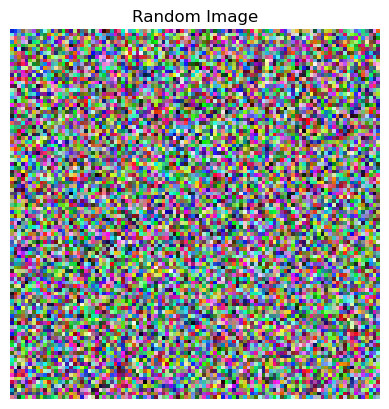

In [1]:
from PIL import Image
import numpy as np

def create_random_image(size=(100, 100)):
    return Image.fromarray(np.random.randint(0, 256, size + (3,), dtype=np.uint8))

def show_image(image, title="Image"):
    import matplotlib.pyplot as plt
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

image = create_random_image()
show_image(image, "Random Image")

In [2]:
(100, 100) + (3,)

(100, 100, 3)

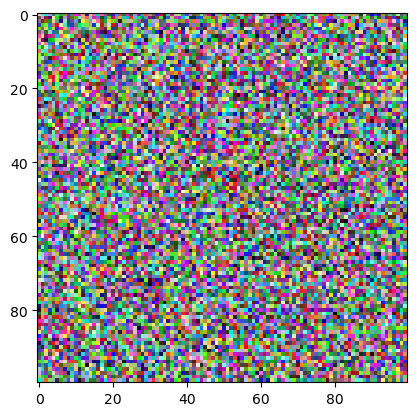

In [3]:
import matplotlib.pyplot as plt
plt.imshow( np.random.randint(0, 256, (100, 100, 3), dtype=np.uint8) )

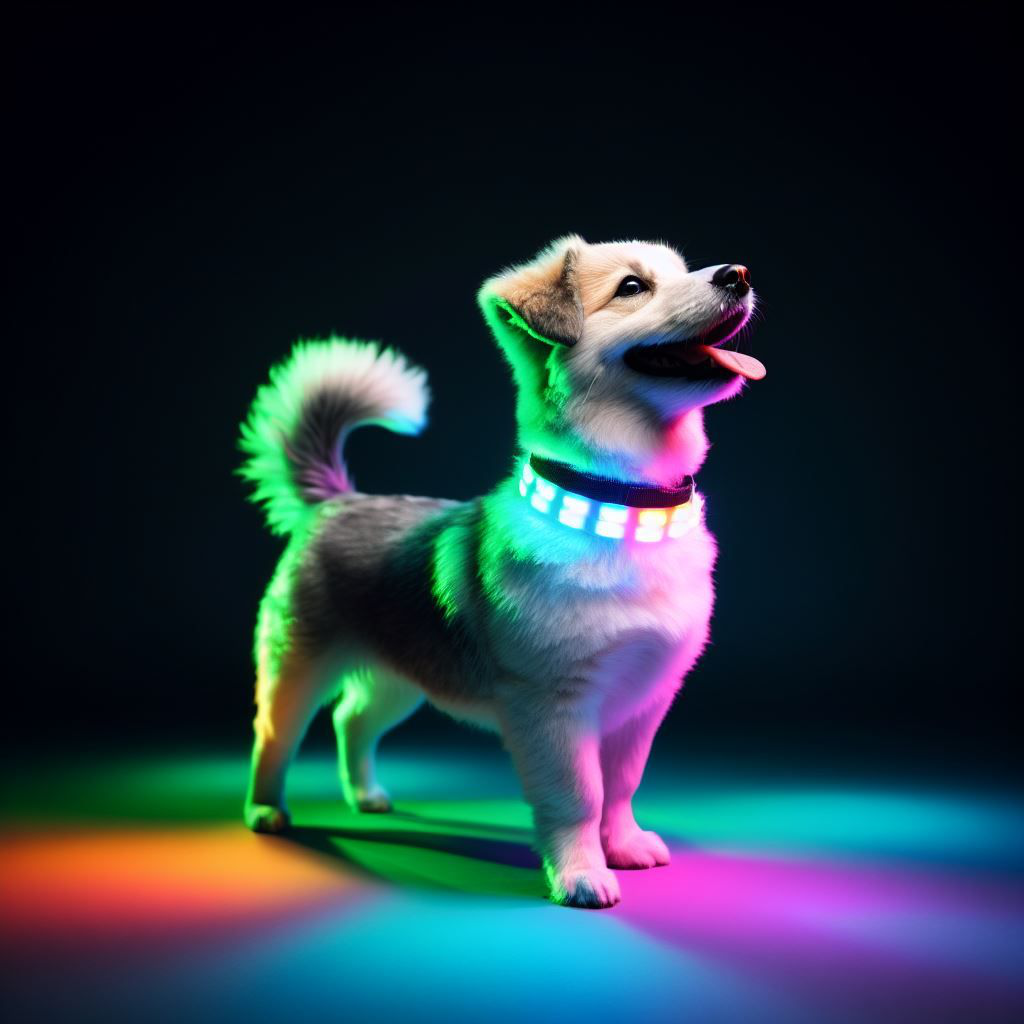

In [5]:
# read image using PIL
image = Image.open("imgs/dog_rgb.jpg")
image

1. 이미지 회전

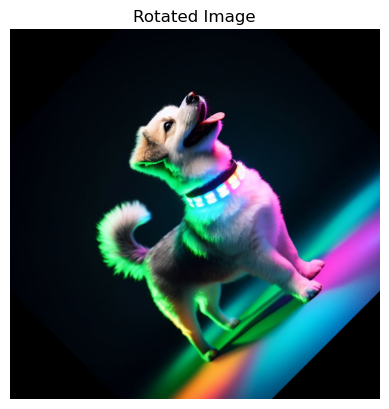

In [6]:
def rotate_image(image, angle):
    return image.rotate(angle)

rotated_image = rotate_image(image, 45)
show_image(rotated_image, "Rotated Image")

2. 이미지 뒤집기

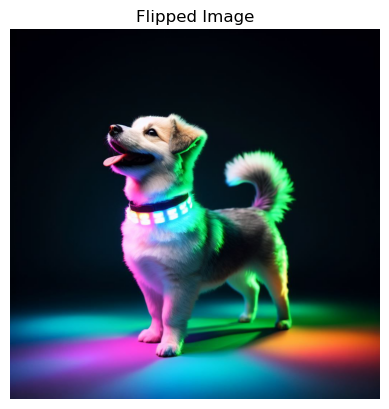

In [7]:
from PIL import ImageOps

def flip_image(image, direction):
    if direction == 'horizontal':
        return ImageOps.mirror(image)
    elif direction == 'vertical':
        return ImageOps.flip(image)

flipped_image = flip_image(image, 'horizontal')
show_image(flipped_image, "Flipped Image")

3. 이미지 이동

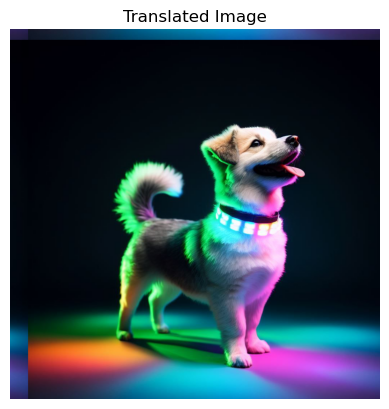

In [8]:
def translate_image(image, x, y):
    array = np.array(image)
    translated_array = np.roll(array, shift=(y, x), axis=(0, 1))
    return Image.fromarray(translated_array)

translated_image = translate_image(image, 50, 30)
show_image(translated_image, "Translated Image")

4. 이미지 크기 조정

Original Image Size: (1024, 1024)
Resized Image Size: (1536, 1536)


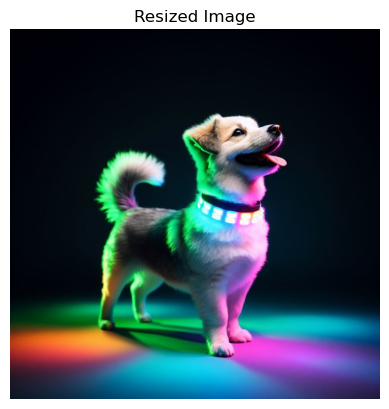

In [9]:
def resize_image(image, scale):
    width, height = image.size
    return image.resize((int(width * scale), int(height * scale)))

print(f"Original Image Size: {image.size}")

resized_image = resize_image(image, 1.5)
print(f"Resized Image Size: {resized_image.size}")
show_image(resized_image, "Resized Image")

5. 이미지 밝기 조절

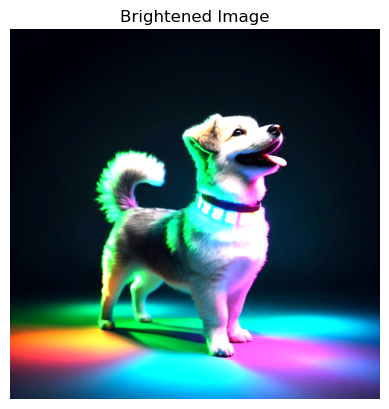

In [10]:
from PIL import ImageEnhance

def change_brightness(image, factor):
    enhancer = ImageEnhance.Brightness(image)
    return enhancer.enhance(factor)

brightened_image = change_brightness(image, 1.5)
show_image(brightened_image, "Brightened Image")

6. 이미지에 노이즈 추가

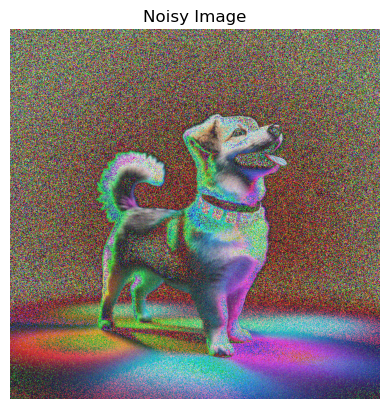

In [11]:
def add_noise(image):
    array = np.array(image)
    noise = np.random.normal(0, 25, array.shape).astype(np.uint8)
    noisy_image = np.clip(array + noise, 0, 255).astype(np.uint8)
    return Image.fromarray(noisy_image)

noisy_image = add_noise(image)
show_image(noisy_image, "Noisy Image")